## Prediction based on a single feature: the number of records associated with the building

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('../data/train_data.csv')

In [3]:
train_data.head(2)

,Unnamed: 0,addr,blighted,event_id_list,lat,lon,llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat,building_id
0,0,00000 mile and hoover,0,[102084],42.4492,-83.0069,-83.007106,42.449098,-83.006694,42.449302,104182
1,1,13000 grand river,0,"[117367, 138527]",42.3821,-83.1731,-83.173306,42.381998,-83.172894,42.382202,41529


In [4]:
train_data.loc[:,'n_records'] = train_data.loc[:,'event_id_list'].apply(lambda x: len(x))

In [5]:
train_data = train_data.loc[:,['building_id','n_records','blighted']]

In [6]:
train_data.head(4)

,building_id,n_records,blighted
0,104182,8,0
1,41529,16,0
2,66123,8,0
3,126624,16,0


## Visualize the feature

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

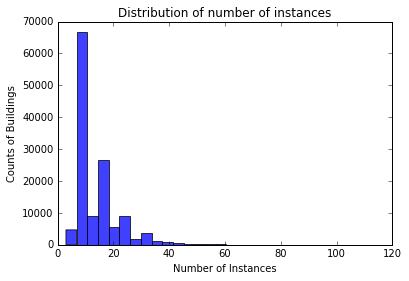

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, patches = ax.hist(train_data['n_records'].values, bins=30, 
                           facecolor='blue', alpha=0.75)

plt.xlabel('Number of Instances')
plt.ylabel('Counts of Buildings')
plt.title('Distribution of number of instances')
plt.show()

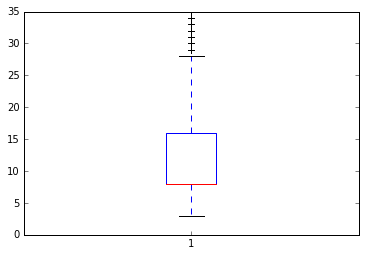

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(train_data['n_records'].values)
plt.ylim(0,35)
plt.show()

The distribution of the feature 'n_records' is severely right skewed.

### Try Log Scale

In [11]:
# Try using log scale
train_data.loc[:,'log_n_records'] = np.log(train_data.loc[:,'n_records'].values)

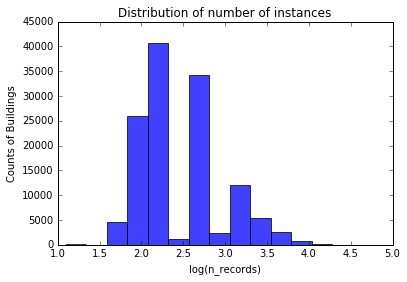

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
n, bins, patches = ax.hist(train_data['log_n_records'].values, bins=15, facecolor='blue', alpha=0.75)
plt.xlabel('log(n_records)')
plt.ylabel('Counts of Buildings')
plt.title('Distribution of number of instances')
plt.show()

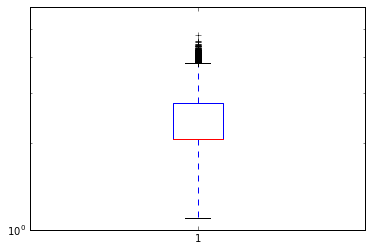

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(train_data['log_n_records'].values)
ax.set_yscale("log", nonposy='clip')
plt.ylim(1,6)
plt.show()

Still right skewed.

### Plot against 'blighted'

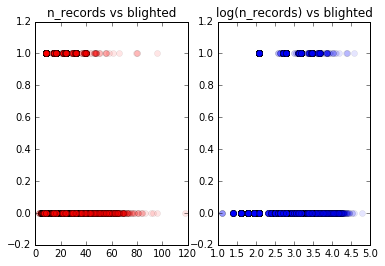

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(train_data['n_records'].values, train_data['blighted'].values,'ro', alpha = 0.1)
ax1.set_ylim(-0.2,1.2)
ax1.set_title("n_records vs blighted")

ax2 = fig.add_subplot(122)
ax2.plot(train_data['log_n_records'].values, train_data['blighted'].values,'bo', alpha = 0.1)
ax2.set_ylim(-0.2,1.2)
ax2.set_title("log(n_records) vs blighted")
plt.show()

## Prediction

In [15]:
from sklearn.svm import SVC

In [26]:
model = SVC(kernel='rbf', class_weight={1:0.984, 0:0.016}, probability=True)   # imbalanced data

In [27]:
X = train_data.loc[:,'n_records'].values
X = X[:, np.newaxis]
y = train_data.loc[:,'blighted']

In [28]:
model.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight={0: 0.016, 1: 0.984}, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
y_fit = model.predict(X)

In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_fit))

[[59597 68253]
 [  156  2197]]


In [31]:
from sklearn.metrics import roc_auc_score, roc_curve

In [32]:
y_proba = model.predict_proba(X)

In [34]:
roc_curve(y, y_fit)

(array([ 0.        ,  0.53385217,  1.        ]),
 array([ 0.        ,  0.93370166,  1.        ]),
 array([2, 1, 0]))